In [ ]:
from __future__ import print_function 
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(11)


In [ ]:
means = [[-2,2],[-2,8],[2.5,2],[2.5,8],[7.5,2],[7.5,8]]
conv =[[1,0],[0,1]]
#so luong du lieu
N=500
X0 = np.random.multivariate_normal(means[0], conv, N)
X1 = np.random.multivariate_normal(means[1], conv, N)
X2 = np.random.multivariate_normal(means[2], conv, N)
X3 = np.random.multivariate_normal(means[3], conv, N)
X4 = np.random.multivariate_normal(means[4], conv, N)
X5 = np.random.multivariate_normal(means[5], conv, N)

X = np.concatenate((X0, X1, X2, X3, X4, X5), axis= 0)
K = 4
original_label = np.asarray([0]*N +[1]*N + [2]*N + [3]*N + [4]*N + [5]*N).T
print(original_label)

[0 0 0 ... 5 5 5]


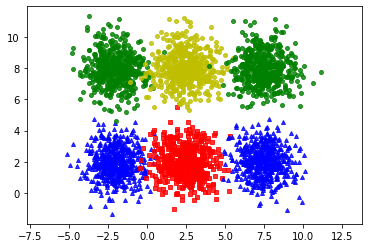

In [ ]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    X3 = X[label == 3, :]
    X4 = X[label == 4, :]
    X5 = X[label == 5, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)
    plt.plot(X3[:, 0], X3[:, 1], 'yo', markersize = 4, alpha = .8)
    plt.plot(X4[:, 0], X4[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X5[:, 0], X5[:, 1], 'go', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()
    
kmeans_display(X, original_label)

In [ ]:
def kmeans_init_centers(X, k):
    # randomly pick k rows of X as initial centers
    return X[np.random.choice(X.shape[0], k, replace=False)]

def kmeans_assign_labels(X, centers):
    # calculate pairwise distances btw data and centers
    D = cdist(X, centers)
    # return index of the closest center
    return np.argmin(D, axis = 1)

def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster 
        Xk = X[labels == k, :]
        # take average
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) == 
        set([tuple(a) for a in new_centers]))

In [ ]:
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0 
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

Centers found by our algorithm:
[[-0.29009607  8.00034409]
 [ 6.80496088  1.99852024]
 [-0.22136118  1.97627262]
 [ 6.80106894  7.94302826]]


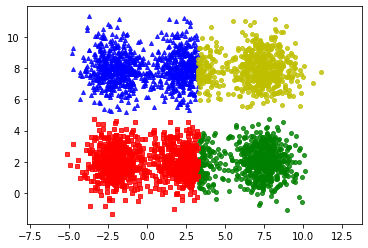

In [ ]:
(centers, labels, it) = kmeans(X, K)
print('Centers found by our algorithm:')
print(centers[-1])

kmeans_display(X, labels[-1])

Centers found by scikit-learn:
[[7.3369784  4.99521802]
 [0.08810573 8.01121243]
 [0.14388678 1.95130291]]


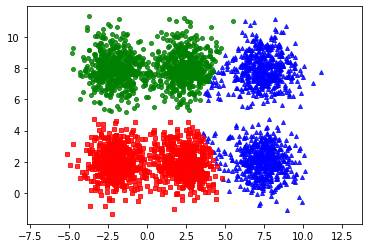

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
print('Centers found by scikit-learn:')
print(kmeans.cluster_centers_)
pred_label = kmeans.predict(X)
kmeans_display(X, pred_label)

Centers found by scikit-learn:
[[-1.00517918e-01  2.01191272e+00]
 [-5.49021217e-04  8.03791404e+00]
 [ 7.05027046e+00  7.90956734e+00]
 [ 7.05147400e+00  1.99950684e+00]]


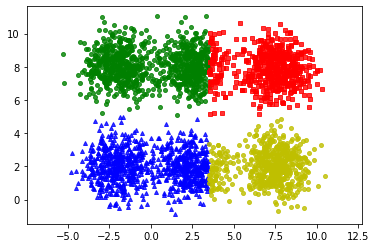

In [ ]:
from sklearn.cluster import KMeans
means = [[-2,2],[-2,8],[2.5,2],[2.5,8],[7.5,2],[7.5,8]]
cov =[[1,0],[0,1]]
N=500
X0 = np.random.multivariate_normal(means[0], conv, N)
X1 = np.random.multivariate_normal(means[1], conv, N)
X2 = np.random.multivariate_normal(means[2], conv, N)
X3 = np.random.multivariate_normal(means[3], conv, N)
X4 = np.random.multivariate_normal(means[4], conv, N)
X5 = np.random.multivariate_normal(means[5], conv, N)

X = np.concatenate((X0, X1, X2, X3, X4, X5), axis= 0)
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
print('Centers found by scikit-learn:')
print(kmeans.cluster_centers_)
pred_label = kmeans.predict(X)
kmeans_display(X, pred_label)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import os
def getData(filename, dirname):
    file_dir = os.path.join('/content/', dirname)
    csv = os.path.join(file_dir, filename)
    return pd.read_csv(csv)

In [ ]:
train_set = getData('/content/train.csv', 'digit-recognizer')
test_set = getData('/content/test.csv' ,'digit-recognizer')

In [ ]:
train_set.shape
x_train = np.array(train_set.drop("label", axis = 1)) / 255
y_train = np.array(train_set.label)
x_test = np.array(test_set)

In [ ]:
x_train.shape
X = x_train.reshape(x_train.shape[0], 28, 28,1)
X.shape

(40725, 28, 28, 1)

In [ ]:
x_test.shape


(28000, 784)

In [ ]:
X_test = x_test.reshape(x_test.shape[0], 28, 28 ,1)

In [ ]:
X_test.shape

(28000, 28, 28, 1)

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,(3,3), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Conv2D(128, (3,3), activation="relu"))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(84, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.compile(optimizer="adam", loss="mean_squared_error", metrics= ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 64)          0         
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         7

In [ ]:
y_one_hot_train = tf.one_hot(y_train, 10)
# encoding , without it the model got a 10% accuracy
model.fit(X,y_one_hot_train, epochs=15, batch_size = 32)

Epoch 1/15
1273/1273 [==============================] - 17s 4ms/step - loss: 0.0573 - accuracy: 0.4514
Epoch 2/15
1273/1273 [==============================] - 5s 4ms/step - loss: 0.0900 - accuracy: 0.1104
Epoch 3/15
1273/1273 [==============================] - 5s 4ms/step - loss: 0.0900 - accuracy: 0.1111
Epoch 4/15
1273/1273 [==============================] - 8s 6ms/step - loss: 0.0900 - accuracy: 0.1111
Epoch 5/15
1273/1273 [==============================] - 5s 4ms/step - loss: 0.0900 - accuracy: 0.1111
Epoch 6/15
1273/1273 [==============================] - 5s 4ms/step - loss: 0.0900 - accuracy: 0.1111
Epoch 7/15
1273/1273 [==============================] - 5s 4ms/step - loss: 0.0900 - accuracy: 0.1111
Epoch 8/15
1273/1273 [==============================] - 5s 4ms/step - loss: 0.0900 - accuracy: 0.1111
Epoch 9/15
1273/1273 [==============================] - 5s 4ms/step - loss: 0.0900 - accuracy: 0.1111
Epoch 10/15
1273/1273 [==============================] - 5s 4ms/step - loss: 0.09

In [ ]:
pred = model.predict(X_test)

In [ ]:
new_pred = tf.math.argmax(pred, axis = -1)
sub = {'ImageId': test_set.index + 1, 'Label': new_pred}
basic_sub = pd.DataFrame(data=sub)
basic_sub.to_csv("submission.csv", index=False)
basic_sub.head()

,ImageId,Label
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1


In [ ]:
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.svm import LinearSVC
from keras.datasets import mnist
from sklearn.metrics import accuracy_score
from google.colab.patches import cv2_imshow


In [ ]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()
 
X_train_feature = []
for i in range(len(X_train)):
    feature = hog(X_train[i],orientations=9,pixels_per_cell=(14,14),cells_per_block=(1,1),block_norm="L2")
    X_train_feature.append(feature)
X_train_feature = np.array(X_train_feature,dtype = np.float32)
 
#cho x_test
X_test_feature = []
for i in range(len(X_test)):
    feature = hog(X_test[i],orientations=9,pixels_per_cell=(14,14),cells_per_block=(1,1),block_norm="L2")
    X_test_feature.append(feature)
X_test_feature = np.array(X_test_feature,dtype=np.float32)


11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
model = LinearSVC(C=10)
model.fit(X_train_feature,y_train)
y_pre = model.predict(X_test_feature)
print(accuracy_score(y_test,y_pre))


0.8988


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
image = cv2.imread("/content/demo.png")
im_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
im_blur = cv2.GaussianBlur(im_gray,(5,5),0)
im,thre = cv2.threshold(im_blur,90,255,cv2.THRESH_BINARY_INV)
contours,hierachy = cv2.findContours(thre,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
rects = [cv2.boundingRect(cnt) for cnt in contours]


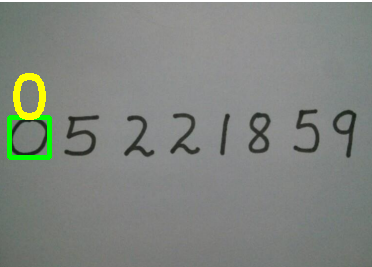

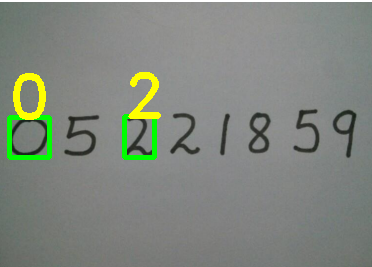

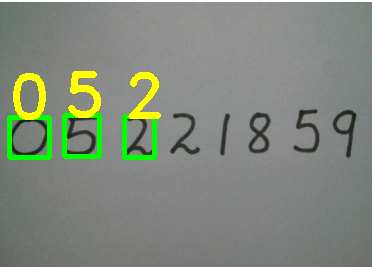

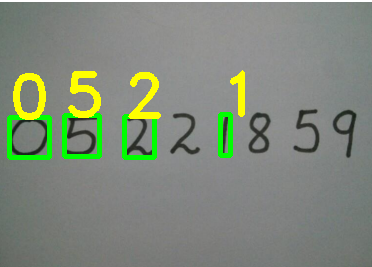

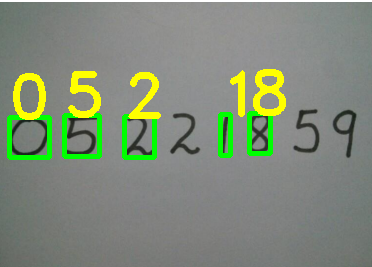

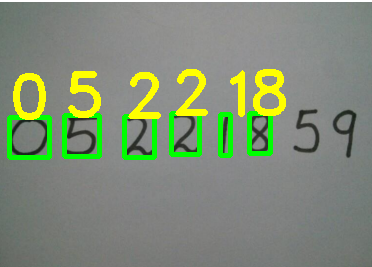

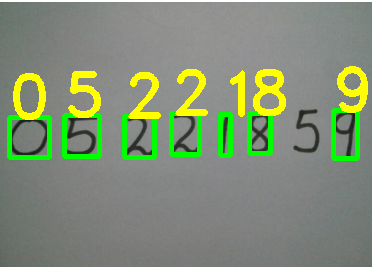

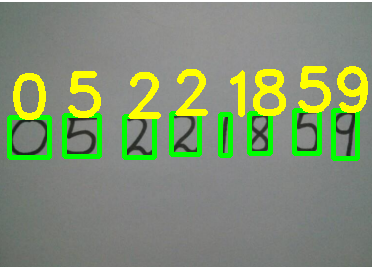

In [ ]:
for i in contours:
    (x,y,w,h) = cv2.boundingRect(i)
    cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),3)
    roi = thre[y:y+h,x:x+w]
    roi = np.pad(roi,(20,20),'constant',constant_values=(0,0))
    roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
    roi = cv2.dilate(roi, (3, 3))
    
    # Calculate the HOG features
    roi_hog_fd = hog(roi, orientations=9, pixels_per_cell=(14, 14), cells_per_block=(1, 1),block_norm="L2")
    nbr = model.predict(np.array([roi_hog_fd], np.float32))
    cv2.putText(image, str(int(nbr[0])), (x, y),cv2.FONT_HERSHEY_DUPLEX, 2, (0, 255, 255), 3)
    cv2_imshow(image)
# cv2.imwrite("image_pand.jpg",image)
